## Supervised Learning Project

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Steps and tasks:
1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings. 
3. Get the target column distribution. Your comments. 
4. Split the data into training and test set in the ratio of 70:30 respectively 
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 
6. Print the confusion matrix for all the above models 
7. Give your reasoning on which is the best model in this case and why it performs better?  

### 1. Read the column description and ensure you understand each attribute well

#### ID                 - Customer's identification number
#### Age                - Age  of customer 
#### Experience         - Years of professional experience..Numerical & probably continuous feature 
#### Income             - Annual income of the customer given in thousand dollars.Numerical & probably continuous feature  
#### ZIPCode            - Customer address zip code.Numerical & probably discrete feature  
#### Family             - Family size.Numerical & probably discrete feature 
#### CCAvg              - Avg. spending on credit cards per month.Numerical & probably continuous feature 
#### Education          - Education Level of customer. Label encoded feature. 
#### Mortgage           - Value of house mortgage if that customer has taken any.Numerical & probably continuous feature
#### Personal Loan      - Target feature. Yes/No type. Technically numerical but actually categorical
#### Securities Account - Yes/No type feature. Technically numerical but actually categorical
#### CD Account         - Yes/No type feature. Technically numerical but actually categorical
#### Online             - Yes/No type feature. Technically numerical but actually categorical
#### CreditCard         - Yes/No type feature. Technically numerical but actually categorical 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# This is done to make Jupyter show all the columns. Otherwise Jupyter hides columns
pd.set_option('max_columns', None)

In [3]:
# Importing data  

missing_value_formats = ["n.a.","?","NA","n/a","na","N.A.","--"," ", "  "]
dataset = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', na_values = missing_value_formats)

## Exploring the dataset

In [6]:
dataset.shape

(5000, 14)

In [1]:
# It has 5000 records & 14 features

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [2]:
# There are 14 features. All are numerical

In [11]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [3]:
# Age => People's age ranges from 23 to 67. Most of the person's age is 45 & average is also 45. 

# Experience => Average experience of people is 20 & most of the people's experience is also 20. Which kind of make sense here becuase average age is 45. 
# Which could mean that most of the people in the dataset had started working at the age of 25 may be just after their college. 
# There is a negative experience which is of course incorrect and needs to be corrected.  

# Income => Average income in the dataset is $73000.77 per year. Most of the people earn $64000 per year. 
# Their are outliers like $8 & $224000,which have impacted the mean & standard deviation. It looks like it is a little bit of positively skewed.

# Family => On an average, people have 2 children.  
# CCAvg => Mostly people spend around $2000 per month. There are outliers here also. $10,000. It looks like it is a little bit of positively skewed.
# Education => Most of the people are graduate. It looks like it is a little bit of negatively skewed.
# Mortgage => Mostly people does not have mortgage. Too many outliers. It looks like it is very higly positively skewed.
# Personal loan => Very few people opted for personal loan

In [8]:
# Checking first 5 rows
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
# Checking last 5 rows
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [10]:
# As we can see Experience feature has negative values, it needs to be treated as experience cannot be negative.
# We also check if any of the other fields has negative value

In [4]:
for feature in dataset.columns:
    print(feature,'=>',dataset[dataset[feature]<0][feature].count())

ID => 0
Age => 0
Experience => 52
Income => 0
ZIP Code => 0
Family => 0
CCAvg => 0
Education => 0
Mortgage => 0
Personal Loan => 0
Securities Account => 0
CD Account => 0
Online => 0
CreditCard => 0


In [22]:
# Only experience has negative values. As experience can never be negative, there are two approaches here.
# 1. Repalce all negative values with 0
# 2. Consider "-" as typographical error and just remove "-"  

# I am moving ahead with option 2

In [5]:
#Removing "-" from negative values
for val in dataset['Experience']:
    if(val<0):
        dataset.replace(to_replace=val,value=val*(-1),inplace=True)

In [6]:
for feature in dataset.columns:
    print(feature,'=>',dataset[dataset[feature]<0][feature].count())

ID => 0
Age => 0
Experience => 0
Income => 0
ZIP Code => 0
Family => 0
CCAvg => 0
Education => 0
Mortgage => 0
Personal Loan => 0
Securities Account => 0
CD Account => 0
Online => 0
CreditCard => 0


In [24]:
# As we can see "-" has been removed from all the negative values

In [7]:
# Checking for skewness
dataset.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.010038
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [ ]:
# Some of the features are skewed like Mortgage,Personal Loan,Securities Account,CD Account. 

In [7]:
# Dropping column ID as it is not serving any business purpose. 
dataset.drop('ID',axis=1,inplace=True)

In [54]:
# Checking for null values

In [10]:
dataset.isnull().any()

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [11]:
dataset.isna().any()

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [59]:
# There are no missing values or NaN values

In [ ]:
# Checking for duplicate records

In [8]:
dataset.duplicated().any()

False

In [ ]:
# There are no duplicate records.

### Univariate Analysis

## 2 Study the data distribution in each attribute, share your finding

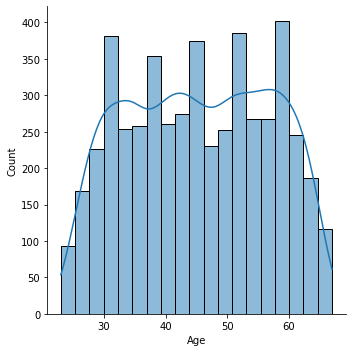

In [10]:
sns.displot(dataset['Age'],kde=True)

In [96]:
# Age seems to have normal distribution. It is not skewed. In the given dataset, most of the people's age ranges from 30 to 60. Mean is also equal to median.

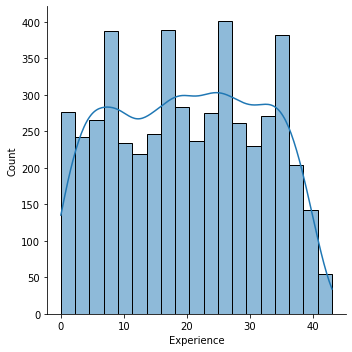

In [97]:
sns.displot(dataset['Experience'],kde=True)

In [98]:
# Similarly like age, it also seems to have normal distribution. It is also not skewed. Mean is closely equal to median.

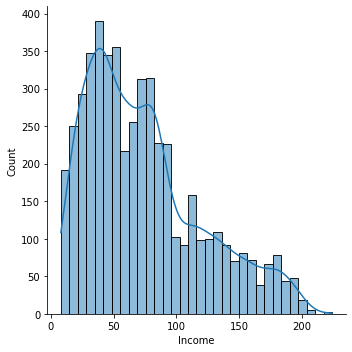

In [99]:
sns.displot(dataset['Income'],kde=True)

In [100]:
# Income is positively skewed. Most of the people have income less than $100,000 per year.

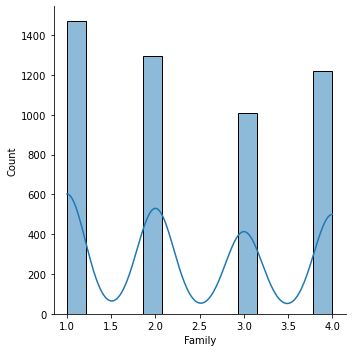

In [102]:
sns.displot(dataset['Family'],kde=True)

In [104]:
# It is an ordinal feature. Most of the people in the dataset have 1 or 2 children but there is a significant number of people having 4 children

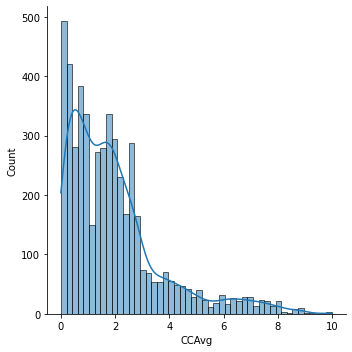

In [105]:
sns.displot(dataset['CCAvg'],kde=True)

In [118]:
# Average spending's on credit card for most of the people lie in the range of 0 to $3,000 per month.
# There are many people whom credit card speding is 0. It is also positively skewed.

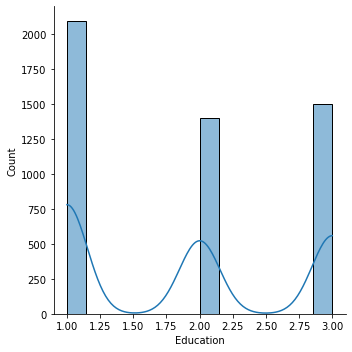

In [107]:
sns.displot(dataset['Education'],kde=True)

In [109]:
# Most of the people belongs to undergraduate or graduate category & rest of market is shared by graduates and professionals equally.

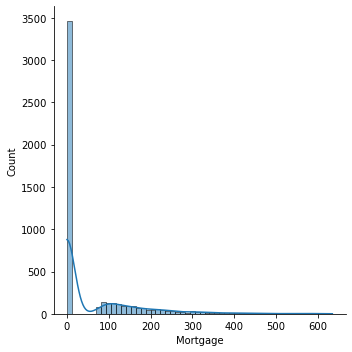

In [111]:
sns.displot(dataset['Mortgage'],kde=True)

In [ ]:
# There are very few people who has mortgage. Around 3500 people does not have any mortgage
# People who pay mortgage, pays in the range from $50,000 to $100,000
# Securities Account, CD Account, Online &  Credit Card are binary categorical attributes and distribution will be explored in bi-variate analysis
# Personal Loan - This is the Target variable defines if customer has accepted the loan in previous campaign. As we have seen above only 10% have taken loan out of 
# 5000. So this creates a considerable bias.

## 3 Get the target column distribution. Your comments

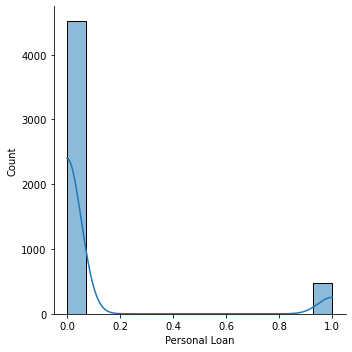

In [60]:
sns.displot(dataset['Personal Loan'],kde=True)

In [ ]:
# Checking for unique values in target variable "Personal Loan"

In [61]:
dataset['Personal Loan'].nunique()

2

In [62]:
# So there are only two types of values present in "Personal Loan"

In [63]:
# Count of each class

In [64]:
# Method 1
pd.crosstab(dataset['Personal Loan'],columns='count')

col_0,count
Personal Loan,
0,4520
1,480


In [65]:
# Method 2
print(dataset['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

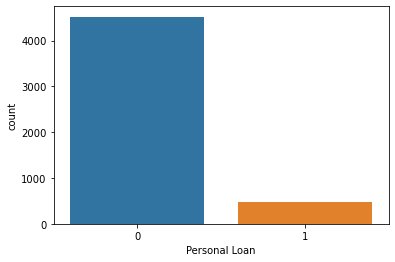

In [66]:
# Method 3
sns.countplot(x='Personal Loan',data=dataset)

In [11]:
# Dataset is highly biased towards non takers of personal loan. Just close to 10% of data is our target data. 
# This would affect our models. We may need to work on that.

In [ ]:
# Like Securities Account, CD Account, Online &  Credit Card , Personal Loan is also a binary categorical attribute & its distribution will be
# more explored in bi-variate analysis. Still, above graph simply shows that the dataset is biased towards non loan takers.

In [21]:
# Getting count of the features. Features 'Income','ZIP Code','CCAvg','Mortgage' are not plotted as they are quite continuous and plotting its count plot does not 
# make any sense

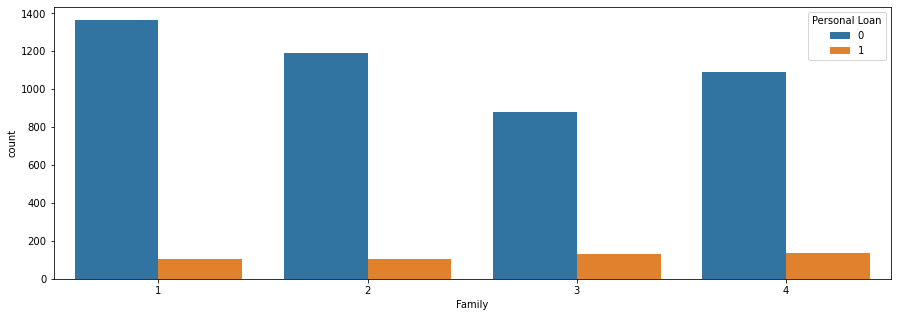

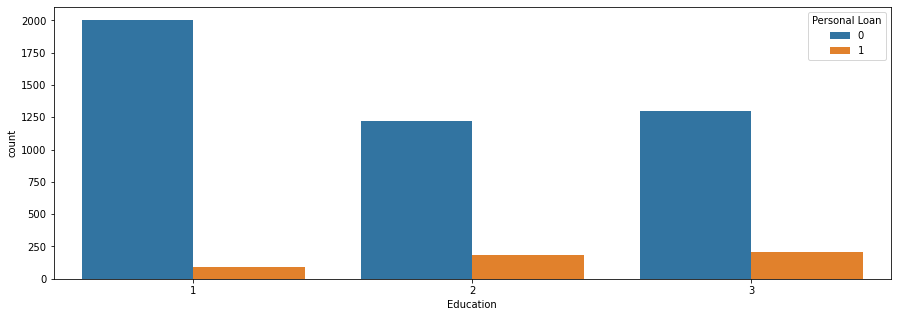

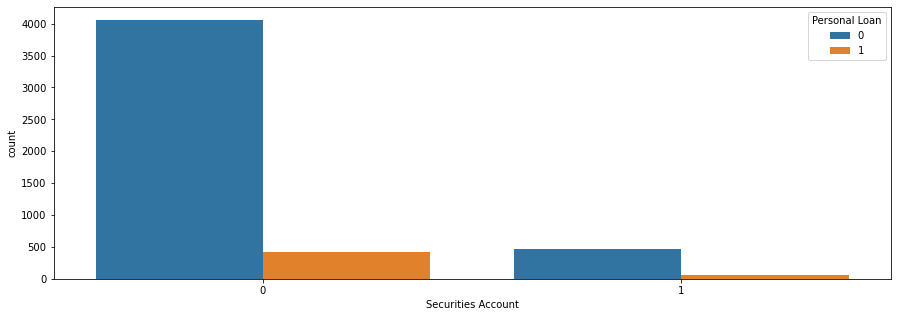

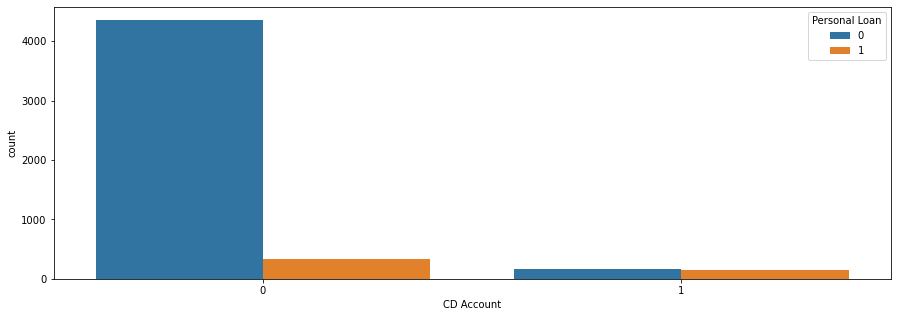

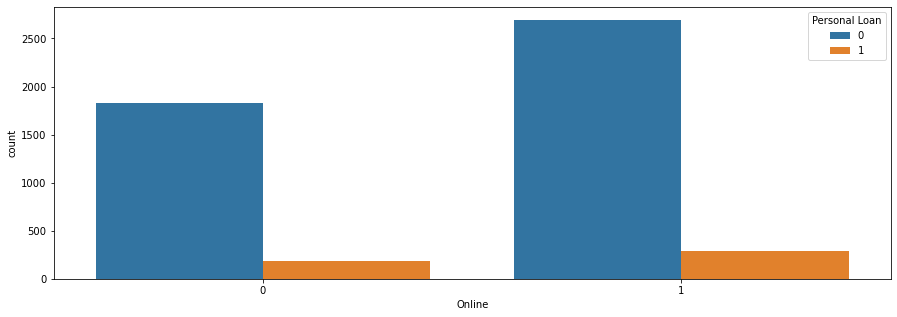

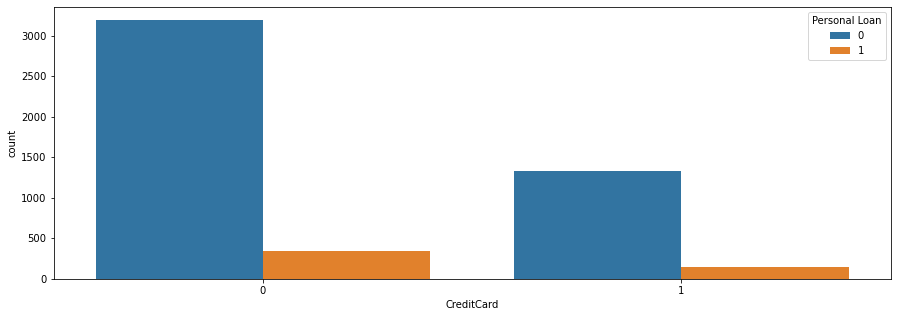

In [164]:
for feature in dataset.columns:
    if(feature not in ['Age','Experience','Income','ZIP Code','CCAvg','Mortgage','Personal Loan']):
        plt.figure(figsize=(15,5))
        sns.countplot(x=feature,hue='Personal Loan',data=dataset )
        plt.show()

In [ ]:
# 1. Family size does not seem to have major influence on the personal Loan but there are slight chances that 
 # family of more than 2 might go for Personal Loan.
# 2. Custumer with higher education seems to prefer personal loan.
# 3. Customer who does not have personal loan seems to have securities account. 
#   So seems people with securities might not usually go for personal loan.
# 4. Majority Customers who does not have CD account , doesnot have loan as well. But almost all customers who has CD account has loan as well.
# 5. Credit Card & Online banking also does not seem to influence loan

In [ ]:
# Checking for outliers

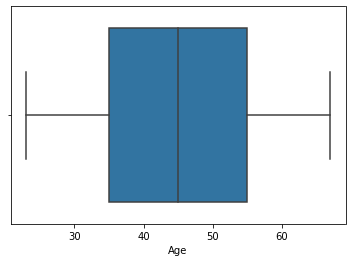

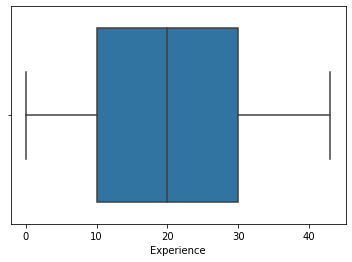

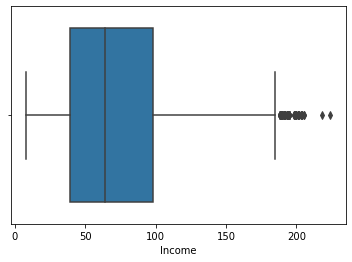

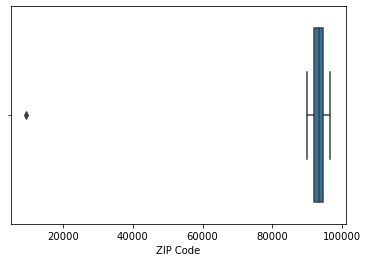

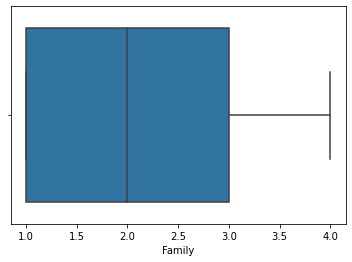

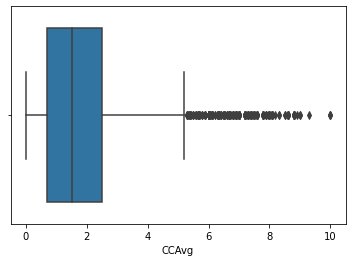

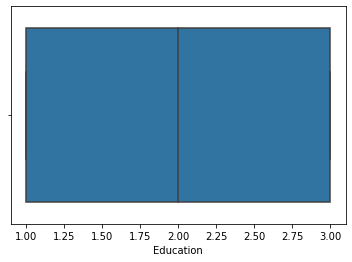

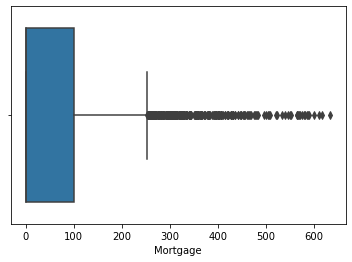

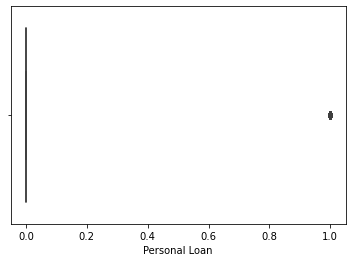

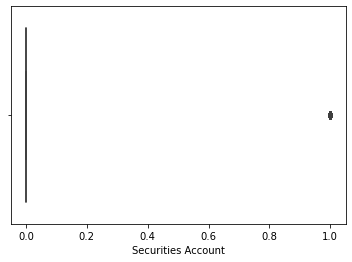

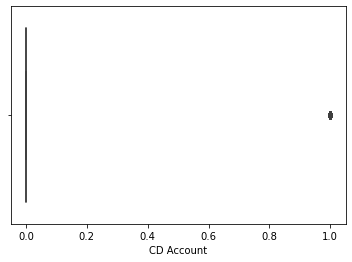

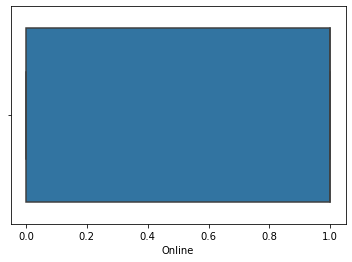

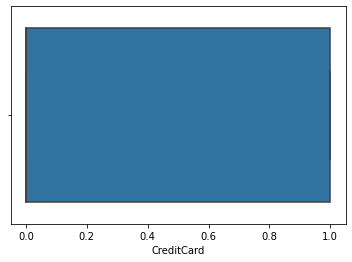

In [26]:
for feature in dataset.columns:
    sns.boxplot(dataset[feature])
    plt.show()

In [ ]:
# Age, Experience, Family, Education, online, Credit Card does not have any outliers
# Income has some outliers 
# Zipcode has just one outlier
# CCAvg & Mortage has many outliers
# Outliers in Personal Loan , Securities Account, CD Account are categorical values, 0 & 1. So values indicated as 1 are not outliers  

In [ ]:
# For now, keeping outliers as it is.

### Bivariate Analysis

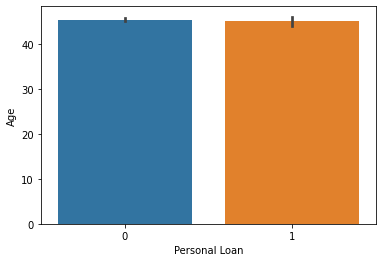

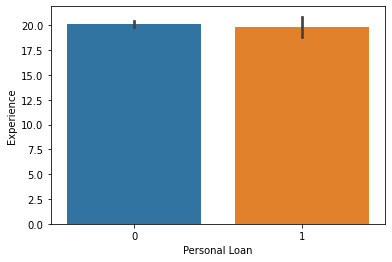

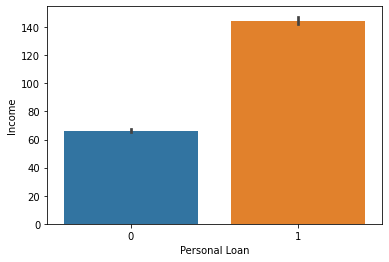

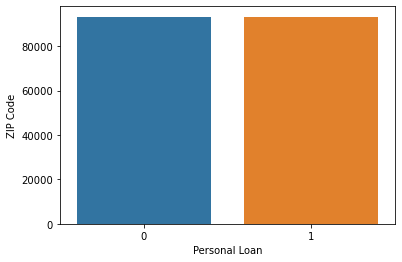

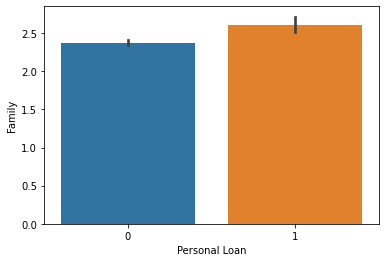

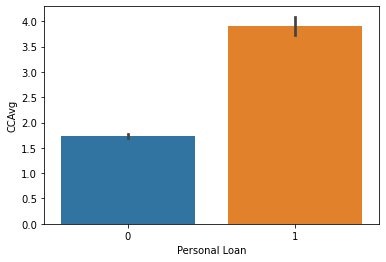

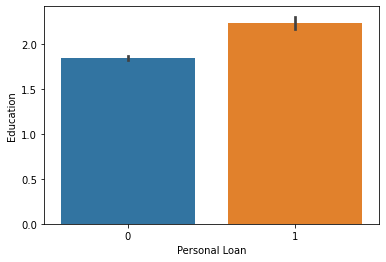

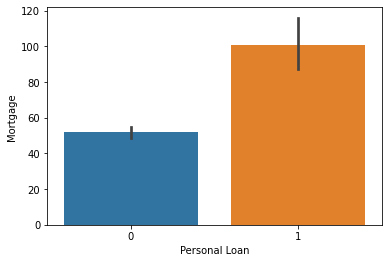

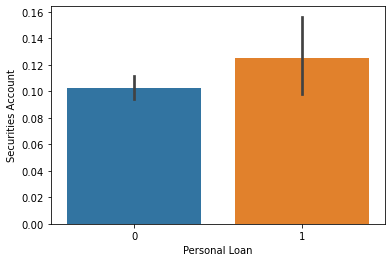

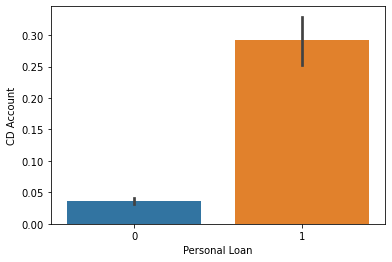

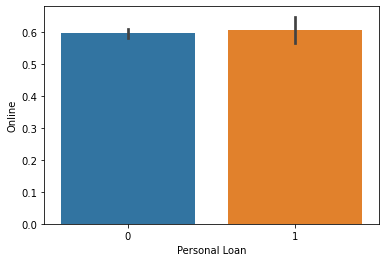

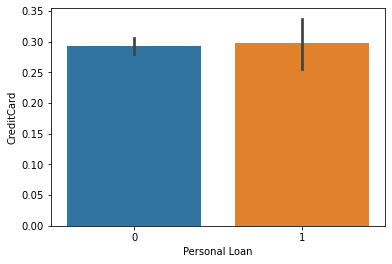

In [156]:
for feature in dataset.columns:
    if(feature != 'Personal Loan'):
        sns.barplot(x='Personal Loan',y=feature,data=dataset)
        plt.show()

In [157]:
# People who has more Income or people whose Avg. spending on credit cards per month (CCAvg) is more or people having certificate of deposit (CD) account with the bank
# or people who pay Mortgage more than $55,000 have taken personal loan more than the people who does not fit any of the three criterias.

In [36]:
# Checking influence of Family & Income On Personal Loan

<AxesSubplot:xlabel='Family', ylabel='Income'>

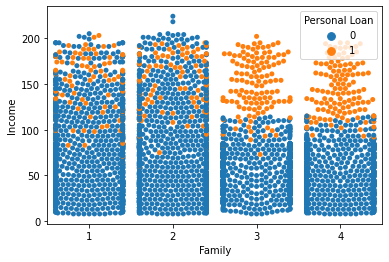

In [38]:
sns.swarmplot(x='Family', y='Income',hue='Personal Loan',data=dataset)

In [ ]:
# Family of 3 & 4 who has income greater $100,000 are more likely to accept personal loan

In [ ]:
# Checking influence of Education & Income On Personal Loan

<AxesSubplot:xlabel='Education', ylabel='Income'>

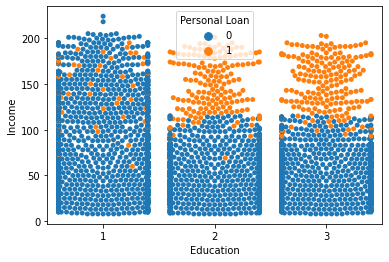

In [40]:
sns.swarmplot(x='Education', y='Income',hue='Personal Loan',data=dataset)

In [ ]:
# Graduates & Professionals who has income greater $100,000 are more likely to accept personal loan

In [ ]:
# Checking influence of Education & Family On Personal Loan

<AxesSubplot:xlabel='Education', ylabel='Family'>

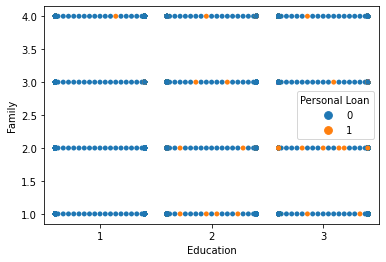

In [41]:
sns.swarmplot(x='Education', y='Family',hue='Personal Loan',data=dataset)

In [42]:
# Professionals having a family of 3 seems to be more likely to accept the loan

In [ ]:
# Checking influence of Education & Experience On Personal Loan

<AxesSubplot:xlabel='Education', ylabel='Experience'>

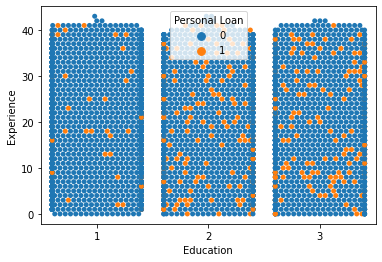

In [43]:
sns.swarmplot(x='Education', y='Experience',hue='Personal Loan',data=dataset)

In [44]:
# Education & Experience together does not contribute much for Personal Loan.

In [45]:
# Checking influence of Education & CCAvg On Personal Loan

<AxesSubplot:xlabel='Education', ylabel='CCAvg'>

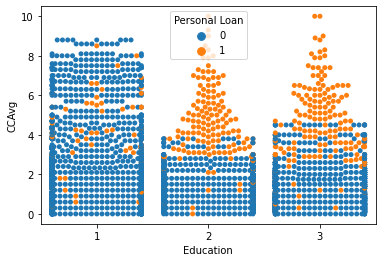

In [46]:
sns.swarmplot(x='Education', y='CCAvg',hue='Personal Loan',data=dataset)

In [ ]:
# Professionals & Graduates who spends equal to or more than $4,000 per month on credit card are very likely to take Personal Loan

In [ ]:
# Checking influence of Credit Card & CCAvg On Personal Loan

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

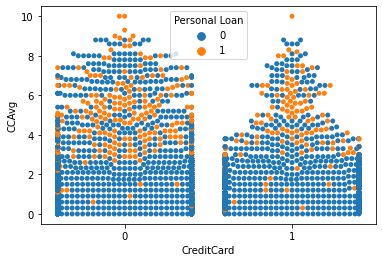

In [48]:
sns.swarmplot(x='CreditCard', y='CCAvg',hue='Personal Loan',data=dataset)

In [ ]:
# Seems like people who does not use credit card (shown by 0) & who spends between $2,500 to $6000 per month on credit card are likely to take loan

In [ ]:
# Checking influence of Education & Mortgage On Personal Loan

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

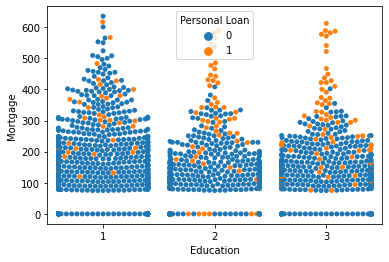

In [49]:
sns.swarmplot(x='Education', y='Mortgage',hue='Personal Loan',data=dataset)

In [50]:
# Very few cases of undergraduates opting for personal loan. 
# Graduates who pays mortgage of more than $150,000 are more likely to opt for a personal loan. Especially who pays morgage of more than $350,000.
# There are a few exceptions where graduates with no mortgage also opted for personal loan.
# Few professionals go for personal loan who pays mortgage between $100,000 & $300,000. Professionals who pays mortgage of more than $300,000 are very likely to 
# to go for loan.

In [83]:
# Looking at the averages

In [82]:
LoanGroupBy=dataset.groupby('Personal Loan')
LoanGroupBy.mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [ ]:
# It can be inferred that people who have taken personal loan:
# 1. have average income of $144,000 which is way more than average income of non loan takers
# 2. spends more than double on credit cards per month 
# 3. pays almost double mortgage than non takers of loan

<AxesSubplot:>

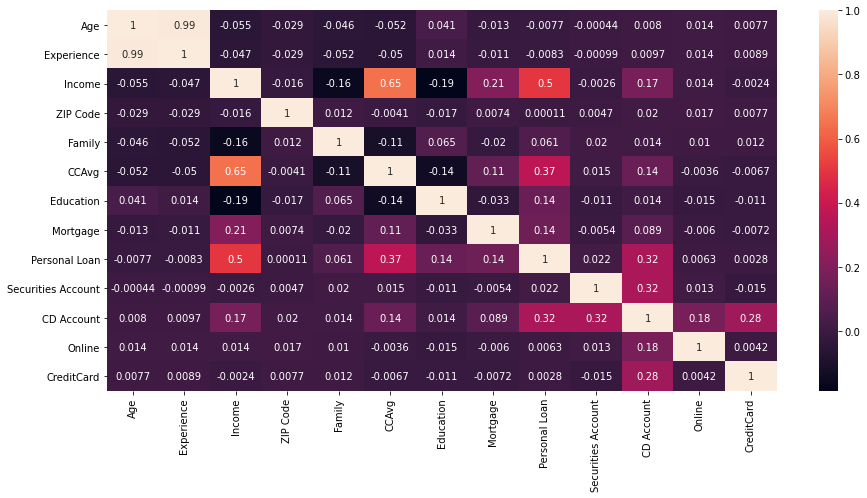

In [51]:
# Plotting Correlation HeatMap

plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
# Looks like Income has strongest correlation with Personal Loan. Next in line is CCAvg & CD Account
# Some instances of multicollinearity are observed.Age & Experience have very strong linear correlation. Also, CCAVG & Income are highly correlated.

In [11]:
# Zip code can be dropped as it does not seems to have any usability
rm_zip = dataset.drop('ZIP Code',axis=1)

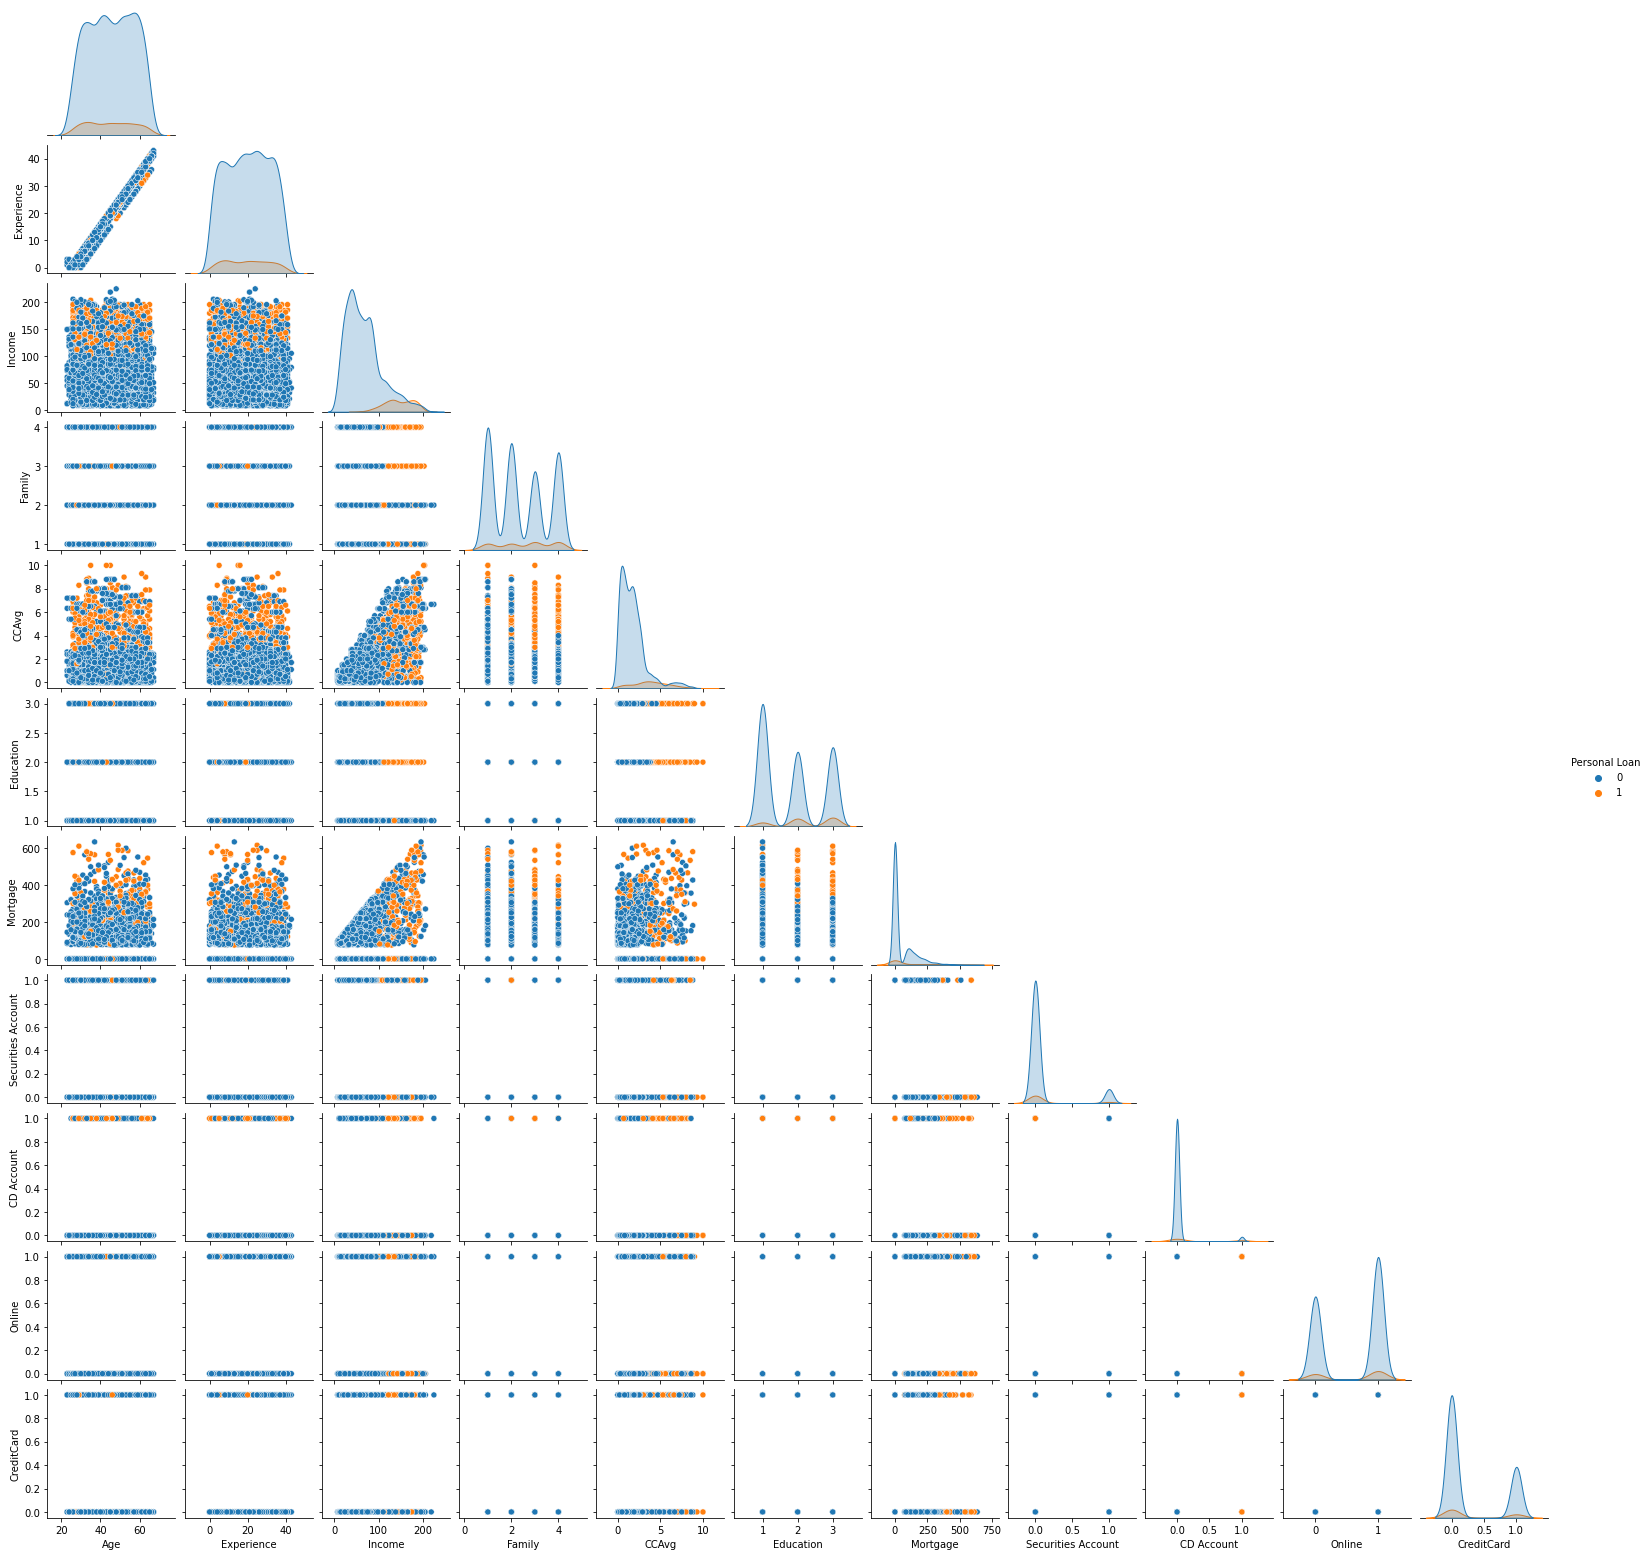

In [58]:
# Plotting pairplot

sns.pairplot(rm_zip,size=2,hue='Personal Loan',corner=True)

In [ ]:
# Income, CCAvg, & CD Account looks like a good predictor as they have good separation. Online & Securities Account also seems to be have good separation.
# Age & Experience have very strong linear relationship. CCAvg & Income also shares linear relation.

In [84]:
# As age has very strong linear relationship with Experience, one of them needs to be dropped. I am choosing Age to drop.

In [12]:
dataset_dropped_cols = rm_zip.drop('Age',axis=1)

In [13]:
dataset_dropped_cols.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Checking for duplicates again after dropping columns

In [14]:
dataset_dropped_cols.duplicated().any()

True

In [148]:
# As now we have the duplicates mainly becuase of removal of ZIP Codes, we need to find the duplicate rows

df=pd.DataFrame(dataset_dropped_cols.duplicated(),columns=['Dups'])
df[df['Dups']==True]

,Dups
799,True
1026,True
1526,True
2031,True
2806,True
3050,True
3453,True
3694,True
4031,True
4058,True


In [15]:
row_numbers = [799,1026,1526,2031,2806,3050,3453,3694,4031,4058,4482,4616,4744,4746]  
dups_records_df=[]

In [16]:
for rec in row_numbers:    
    r=dataset_dropped_cols.iloc[rec:rec+1] 
    dups_records_df.append(r)    
    

In [23]:
# For some unknown reasons to me, this for loop does not work. So had to print each dataframe manually

for rec in np.arange(0,len(row_numbers)):      
    dups_records_df[rec]    
    

In [236]:
dups_records_df[0]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
799,3,39,4,2.1,3,0,0,0,0,1,0


In [208]:
dups_records_df[1]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1026,4,43,3,0.1,2,0,0,0,0,1,0


In [209]:
dups_records_df[2]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1526,10,80,4,2.2,2,0,0,0,0,1,0


In [210]:
dups_records_df[3]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2031,35,80,3,0.5,1,0,0,0,0,1,0


In [221]:
dups_records_df[4]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2806,27,59,2,0.8,3,0,0,0,0,1,0


In [220]:
dups_records_df[5]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3050,25,58,1,1.3,2,0,0,0,0,1,0


In [219]:
dups_records_df[6]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3453,3,31,4,0.3,2,0,0,0,0,1,0


In [218]:
dups_records_df[7]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3694,8,21,1,0.67,3,0,0,0,0,1,0


In [217]:
dups_records_df[8]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4031,18,29,1,0.3,3,0,0,0,0,1,0


In [216]:
dups_records_df[9]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4058,15,65,1,1.5,3,0,0,0,0,0,0


In [215]:
dups_records_df[10]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4482,14,28,2,0.8,3,0,0,0,0,0,0


In [214]:
dups_records_df[11]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4616,41,114,1,0.8,3,0,0,0,0,1,1


In [213]:
dups_records_df[12]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4744,20,72,3,0.3,3,0,0,0,0,1,0


In [211]:
dups_records_df[13]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4746,7,18,1,0.4,3,0,0,0,0,1,0


In [ ]:
# Now Using Experience & Income as condition and finding each duplicate row

In [240]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==3) & (dataset_dropped_cols['Income']==39)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
590,3,39,4,2.1,3,0,0,0,0,1,0
799,3,39,4,2.1,3,0,0,0,0,1,0
2072,3,39,4,0.2,1,137,0,0,0,1,1


In [131]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==4) & (dataset_dropped_cols['Income']==43)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
930,4,43,3,0.1,2,0,0,0,0,1,0
1026,4,43,3,0.1,2,0,0,0,0,1,0
1479,4,43,1,1.0,3,102,0,0,0,0,0
2048,4,43,1,1.8,2,0,0,0,0,1,1


In [133]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==10) & (dataset_dropped_cols['Income']==80)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
738,10,80,4,2.2,2,0,0,0,0,1,0
1526,10,80,4,2.2,2,0,0,0,0,1,0


In [232]:
cleansed_data[(cleansed_data['Experience']==35) & (cleansed_data['Income']==80)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
125,35,80,3,0.5,1,0,0,0,0,1,0
161,35,80,2,2.8,1,0,0,0,0,1,0
2031,35,80,3,0.5,1,0,0,0,0,1,0
4938,35,80,4,1.7,3,0,0,0,0,1,0


In [231]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==27) & (dataset_dropped_cols['Income']==59)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2626,27,59,2,0.8,3,0,0,0,0,1,0
2806,27,59,2,0.8,3,0,0,0,0,1,0


In [230]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==25) & (dataset_dropped_cols['Income']==58)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2886,25,58,1,1.3,2,0,0,0,0,1,0
3050,25,58,1,1.3,2,0,0,0,0,1,0
4222,25,58,3,0.7,2,223,0,0,0,0,0
4990,25,58,4,2.0,3,219,0,0,0,0,1


In [229]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==3) & (dataset_dropped_cols['Income']==31)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
789,3,31,4,0.3,2,0,0,0,0,1,0
3453,3,31,4,0.3,2,0,0,0,0,1,0


In [228]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==8) & (dataset_dropped_cols['Income']==21)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3365,8,21,1,0.67,3,0,0,0,0,1,0
3694,8,21,1,0.67,3,0,0,0,0,1,0
4724,8,21,4,1.00,1,0,0,0,0,0,0


In [227]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==18) & (dataset_dropped_cols['Income']==29)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1096,18,29,1,0.3,3,0,0,0,0,1,0
3223,18,29,1,0.5,3,0,0,0,0,1,0
4031,18,29,1,0.3,3,0,0,0,0,1,0


In [226]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==15) & (dataset_dropped_cols['Income']==65)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2552,15,65,1,1.5,3,0,0,0,0,0,0
3194,15,65,3,0.5,3,0,0,0,0,0,0
3346,15,65,2,2.8,1,0,0,0,0,1,1
4058,15,65,1,1.5,3,0,0,0,0,0,0


In [225]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==14) & (dataset_dropped_cols['Income']==28)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
991,14,28,4,1.5,3,0,0,0,0,0,1
1799,14,28,4,0.4,2,100,0,0,0,1,0
2644,14,28,2,0.8,3,0,0,0,0,0,0
3429,14,28,2,1.4,2,108,0,0,0,0,1
4482,14,28,2,0.8,3,0,0,0,0,0,0


In [224]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==41) & (dataset_dropped_cols['Income']==114)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3264,41,114,4,2.4,3,0,0,0,0,1,0
3420,41,114,1,0.8,3,0,0,0,0,1,1
4616,41,114,1,0.8,3,0,0,0,0,1,1


In [223]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==20) & (dataset_dropped_cols['Income']==72)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
218,20,72,3,0.3,3,0,0,0,0,1,0
2458,20,72,2,0.8,3,0,0,0,0,1,1
4150,20,72,2,1.7,2,75,0,0,0,1,0
4744,20,72,3,0.3,3,0,0,0,0,1,0


In [222]:
dataset_dropped_cols[(dataset_dropped_cols['Experience']==7) & (dataset_dropped_cols['Income']==18)]

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2058,7,18,1,0.6,3,0,0,0,0,0,0
3227,7,18,1,0.4,3,0,0,0,0,1,0
4427,7,18,1,0.4,3,0,0,0,0,0,0
4746,7,18,1,0.4,3,0,0,0,0,1,0


In [237]:
# Though this is not the ideal way to find each duplicate record, it was manageble becuase we just had 14 records.
# For larger set of duplicated records, we may need to find other solutions

In [238]:
# Now we can safely delete duplicated records

In [24]:
dataset_dropped_cols.duplicated().sum()

14

In [25]:
cleansed_data=dataset_dropped_cols.drop_duplicates()

In [26]:
cleansed_data.duplicated().sum()

0

In [27]:
# All duplicates are removed

In [28]:
cleansed_data.shape

(4986, 11)

In [29]:
# Now we have 4986 rows

In [30]:
cleansed_data.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [31]:
# Now transforming data to be as normal as possible as models perform better on normal data
# Power Transformation is done to make data normal.

In [32]:
cleansed_data_copied=cleansed_data.copy()

In [33]:
# We need only continuous features to be transformed
cleansed_data_copied_cont=cleansed_data_copied.iloc[:,0:6]

In [34]:
# Dropping Family & Education Column
cleansed_data_copied_cont.drop('Family',axis=1,inplace=True)

In [35]:
cleansed_data_copied_cont.drop('Education',axis=1,inplace=True)

In [36]:
power_transform = PowerTransformer(method='yeo-johnson', standardize=True)

In [37]:
cleansed_data_copied_cont_transformed = power_transform.fit_transform(cleansed_data_copied_cont)
cleansed_data_copied_cont_transformed = pd.DataFrame(cleansed_data_copied_cont_transformed,columns = cleansed_data_copied_cont.columns)

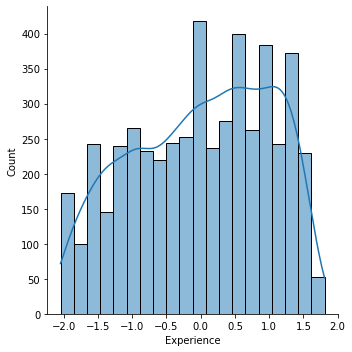

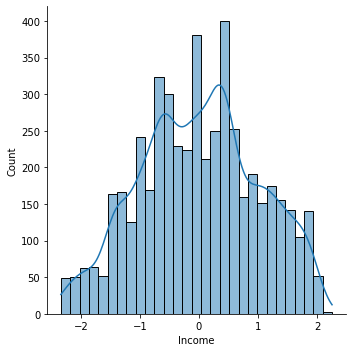

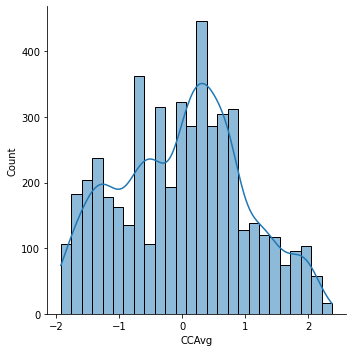

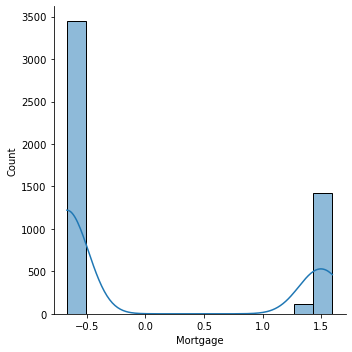

In [38]:
for feature in cleansed_data_copied_cont_transformed.columns: 
    sns.displot(cleansed_data_copied_cont_transformed[feature],kde=True)
    plt.show()  
 

In [275]:
# Mortgage has completely changed
# CCAvg & Income has become somewhat normal
# Experience has looks a bit different than the original

# Lets build model on these, if we don't get satisfactory results then we might need to use original

In [39]:
cleansed_data_copied.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [40]:
cleansed_data_copied_cont_transformed.head()

,Experience,Income,CCAvg,Mortgage
0,-1.883930,-0.375227,0.116884,-0.667677
1,-0.018890,-0.859536,0.042651,-0.667677
2,-0.368407,-2.067513,-0.394419,-0.667677
3,-0.938401,0.723644,0.751691,-0.667677
4,-1.040880,-0.492555,-0.394419,-0.667677


In [ ]:
# Dropping original coulms with continuous values and adding transformed dataframe 

In [41]:
cleansed_data_copied.drop('Experience',axis=1,inplace=True)

In [42]:
cleansed_data_copied.drop('Income',axis=1,inplace=True)

In [43]:
cleansed_data_copied.drop('CCAvg',axis=1,inplace=True)

In [44]:
cleansed_data_copied.drop('Mortgage',axis=1,inplace=True)

In [45]:
final_dataset = pd.merge(cleansed_data_copied_cont_transformed,cleansed_data_copied,right_index=True, left_index=True)

In [46]:
final_dataset.head()

,Experience,Income,CCAvg,Mortgage,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.883930,-0.375227,0.116884,-0.667677,4,1,0,1,0,0,0
1,-0.018890,-0.859536,0.042651,-0.667677,3,1,0,1,0,0,0
2,-0.368407,-2.067513,-0.394419,-0.667677,1,1,0,0,0,0,0
3,-0.938401,0.723644,0.751691,-0.667677,1,2,0,0,0,0,0
4,-1.040880,-0.492555,-0.394419,-0.667677,4,2,0,0,0,0,1


In [47]:
# Keeping X in uppercase & y in lowercase as per standard convention

X = final_dataset[:]
X.drop('Personal Loan',axis=1,inplace=True)
y = final_dataset.iloc[:,6:7]

In [48]:
X.head()

,Experience,Income,CCAvg,Mortgage,Family,Education,Securities Account,CD Account,Online,CreditCard
0,-1.883930,-0.375227,0.116884,-0.667677,4,1,1,0,0,0
1,-0.018890,-0.859536,0.042651,-0.667677,3,1,1,0,0,0
2,-0.368407,-2.067513,-0.394419,-0.667677,1,1,0,0,0,0
3,-0.938401,0.723644,0.751691,-0.667677,1,2,0,0,0,0
4,-1.040880,-0.492555,-0.394419,-0.667677,4,2,0,0,0,1


In [49]:
y.head(10)

,Personal Loan
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


## 4. Split the data into training and test set in the ratio of 70:30 respectively
## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans
## 6. Print the confusion matrix for all the above models

#### Training KNN

Plotting Train Test Error For Random State  1


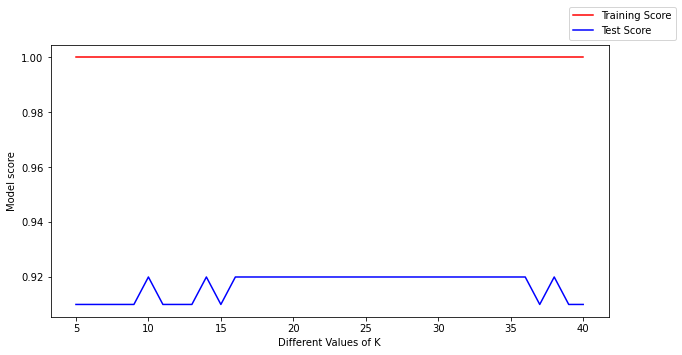

Plotting Train Test Error For Random State  2


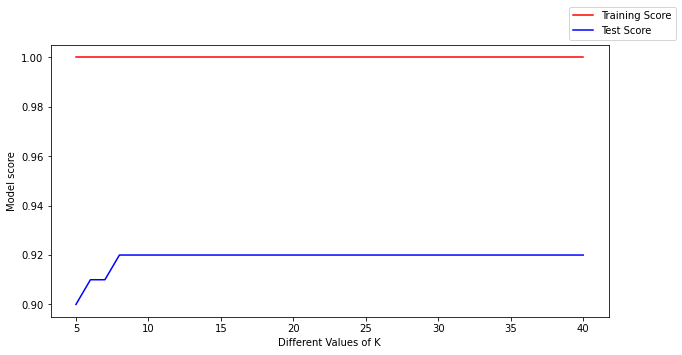

Plotting Train Test Error For Random State  3


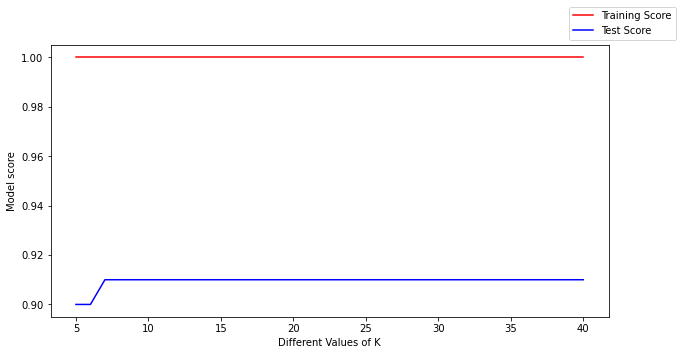

Plotting Train Test Error For Random State  4


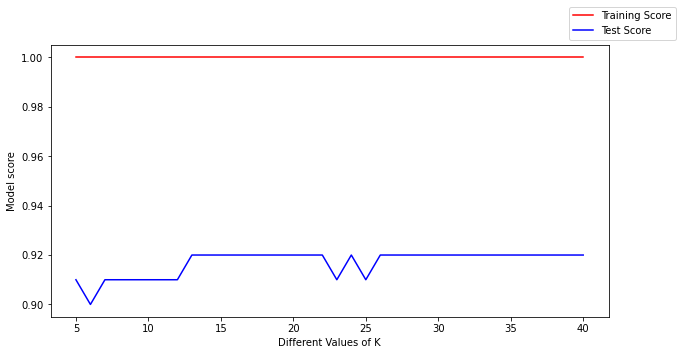

Plotting Train Test Error For Random State  5


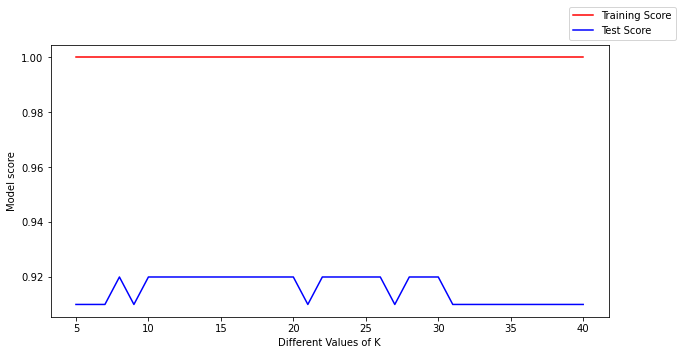

Plotting Train Test Error For Random State  6


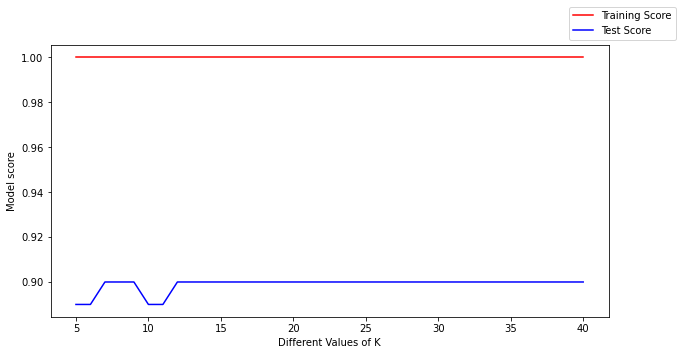

Plotting Train Test Error For Random State  7


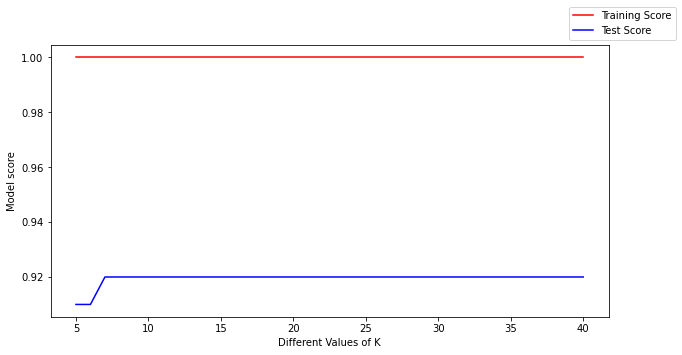

Plotting Train Test Error For Random State  8


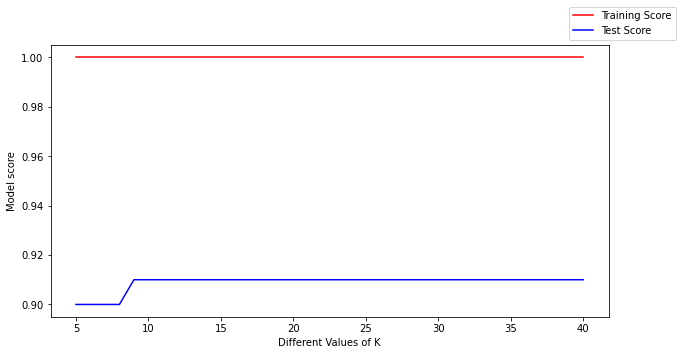

Plotting Train Test Error For Random State  9


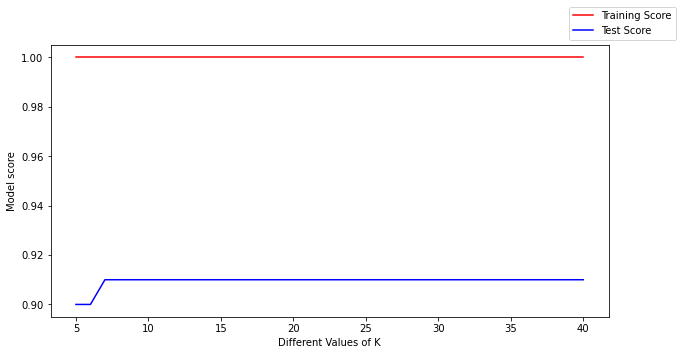

Plotting Train Test Error For Random State  10


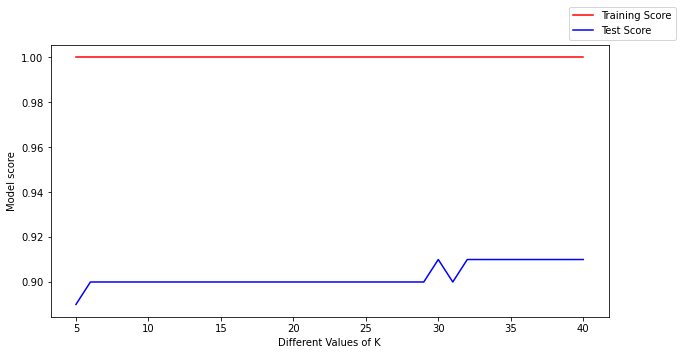

Plotting Train Test Error For Random State  11


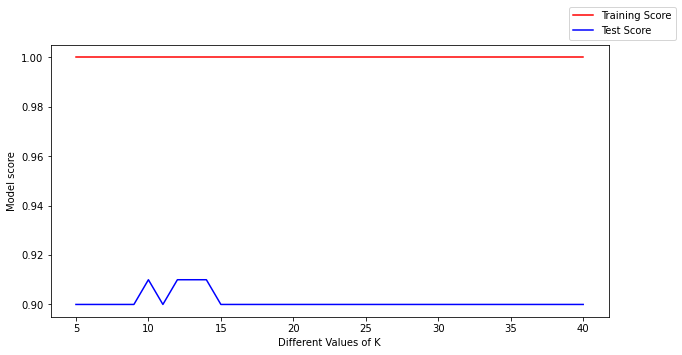

Plotting Train Test Error For Random State  12


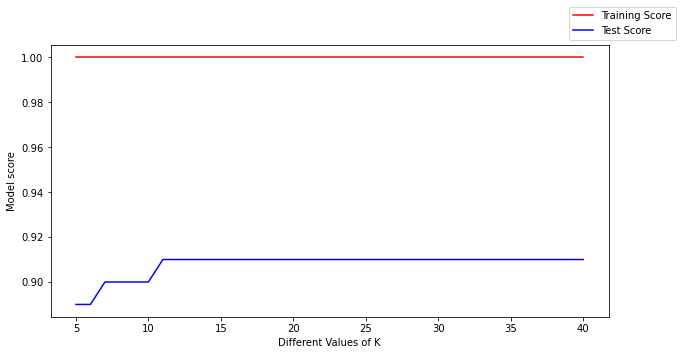

Plotting Train Test Error For Random State  13


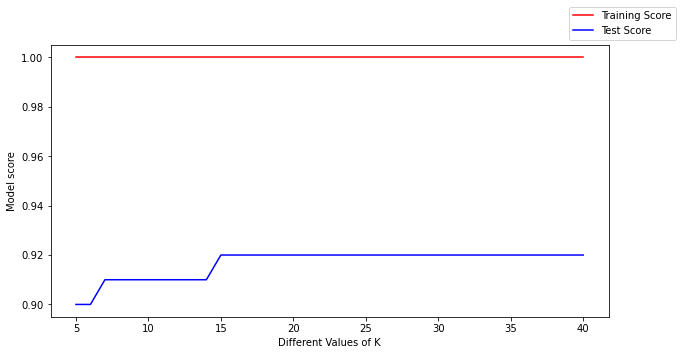

Plotting Train Test Error For Random State  14


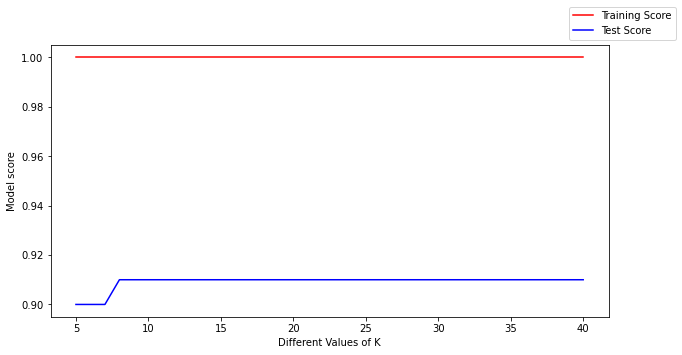

Plotting Train Test Error For Random State  15


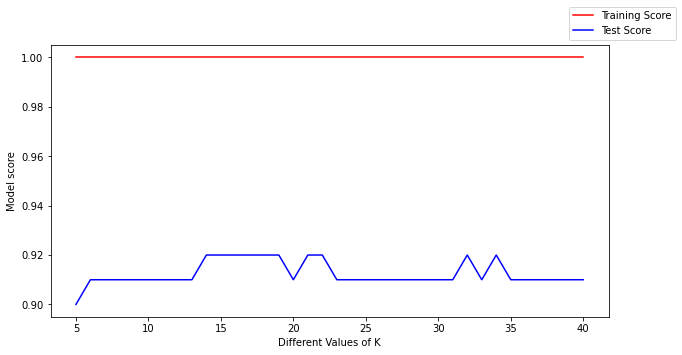

Plotting Train Test Error For Random State  16


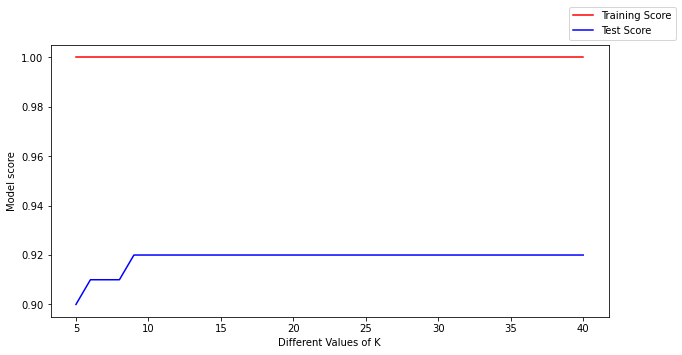

Plotting Train Test Error For Random State  17


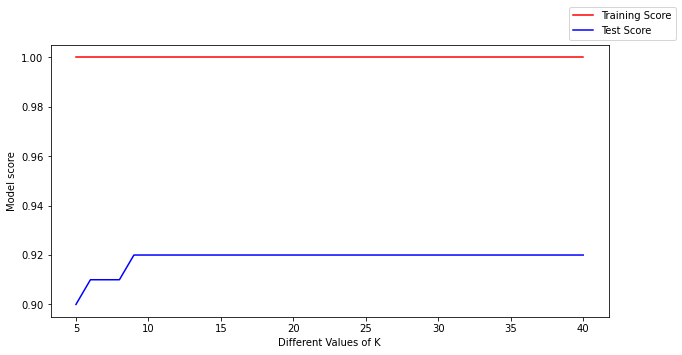

Plotting Train Test Error For Random State  18


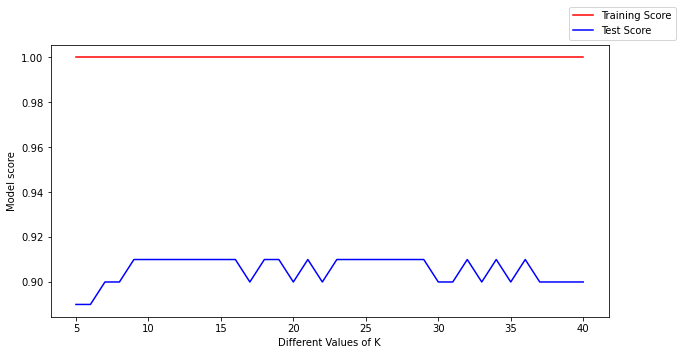

Plotting Train Test Error For Random State  19


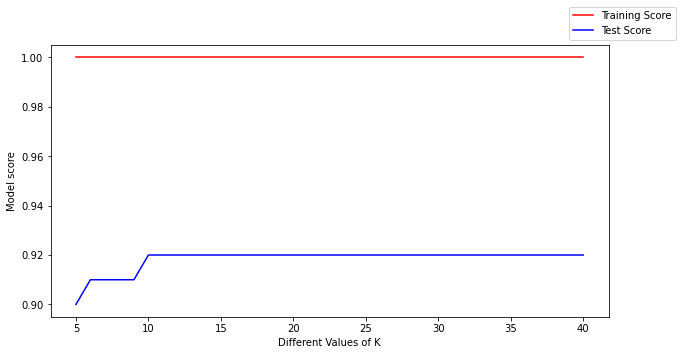

Plotting Train Test Error For Random State  20


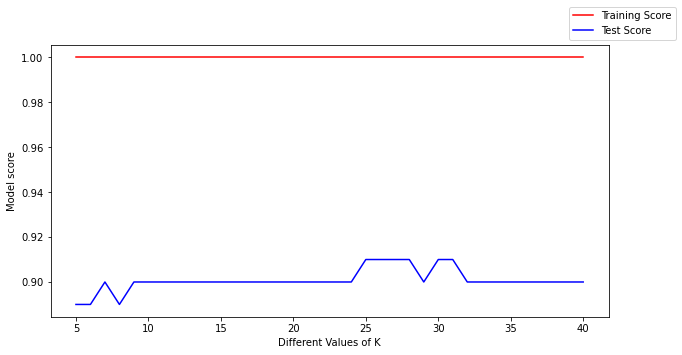

Plotting Train Test Error For Random State  21


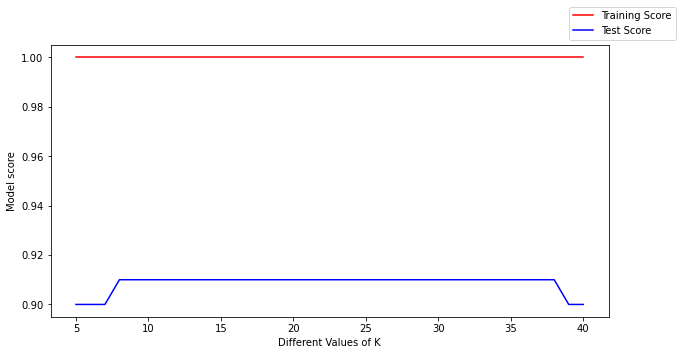

Plotting Train Test Error For Random State  22


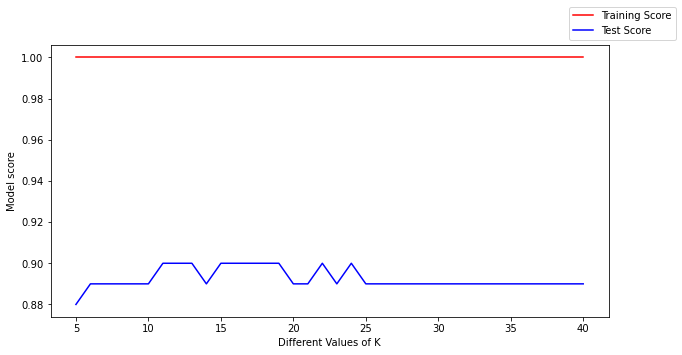

Plotting Train Test Error For Random State  23


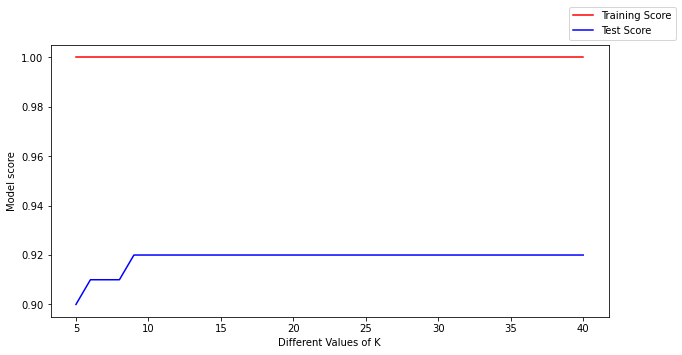

Plotting Train Test Error For Random State  24


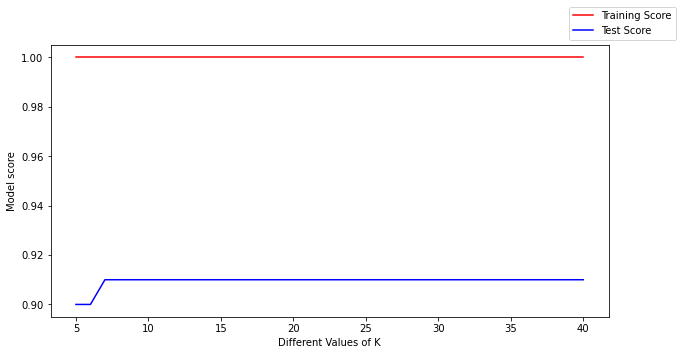

Plotting Train Test Error For Random State  25


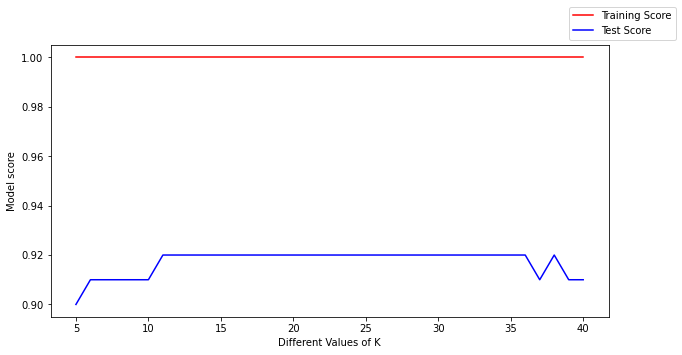

Plotting Train Test Error For Random State  26


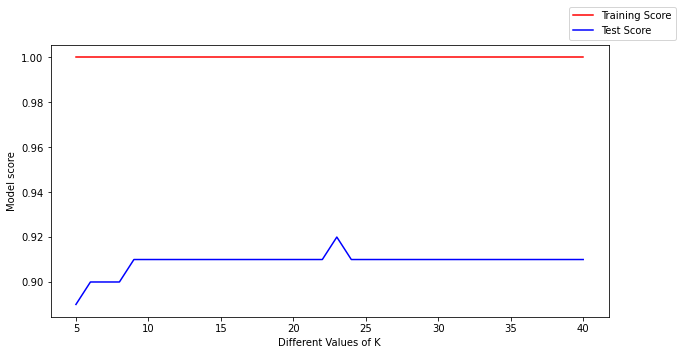

Plotting Train Test Error For Random State  27


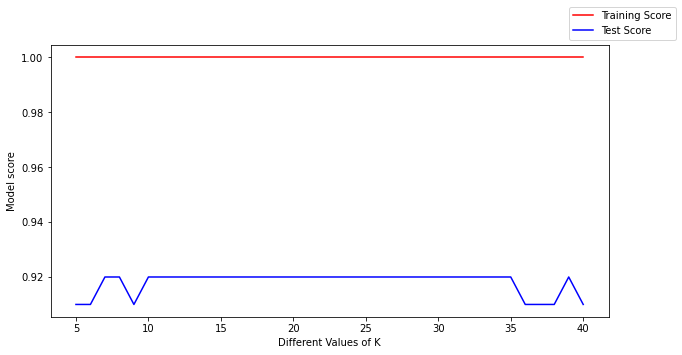

Plotting Train Test Error For Random State  28


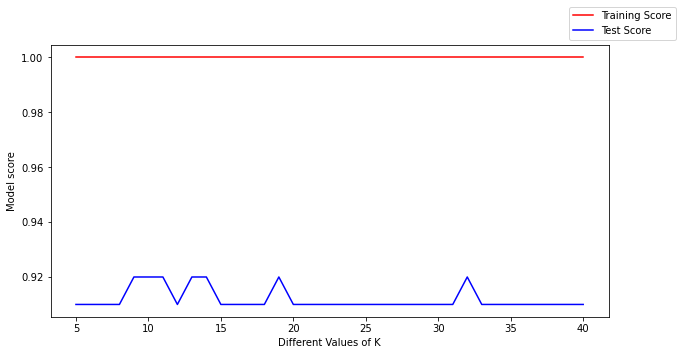

Plotting Train Test Error For Random State  29


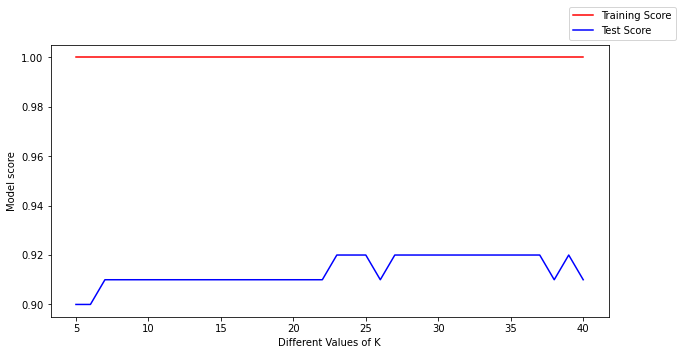

Plotting Train Test Error For Random State  30


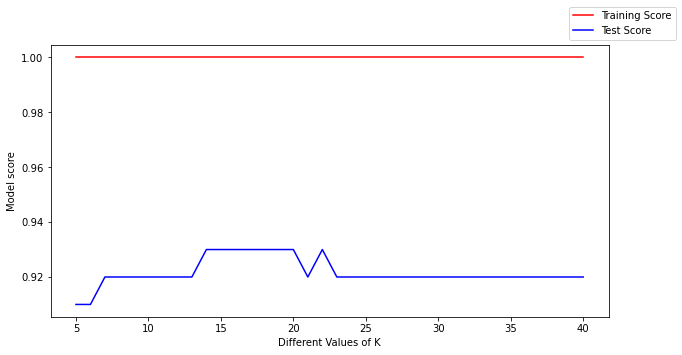

Plotting Train Test Error For Random State  31


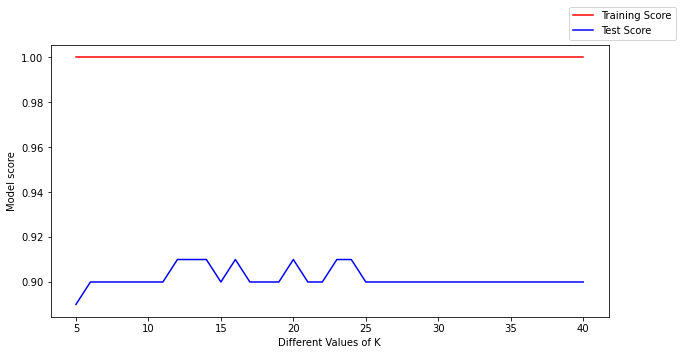

Plotting Train Test Error For Random State  32


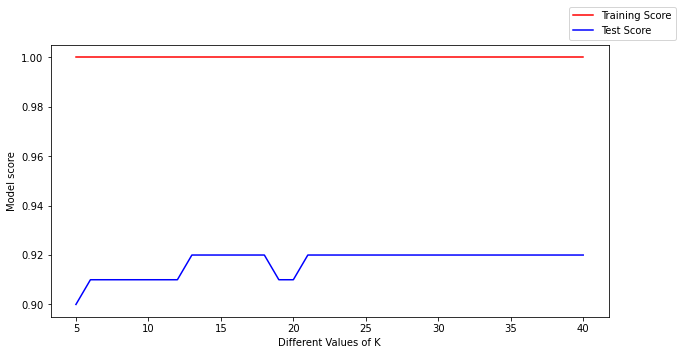

Plotting Train Test Error For Random State  33


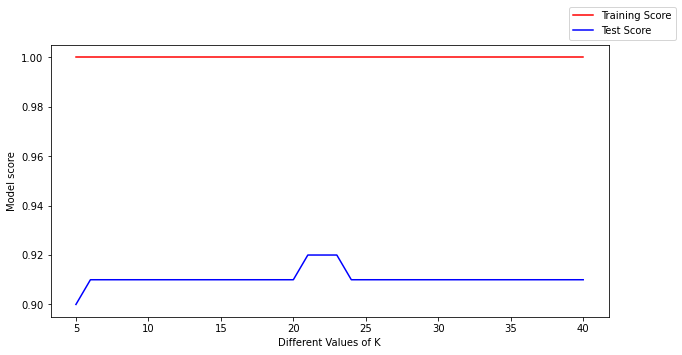

Plotting Train Test Error For Random State  34


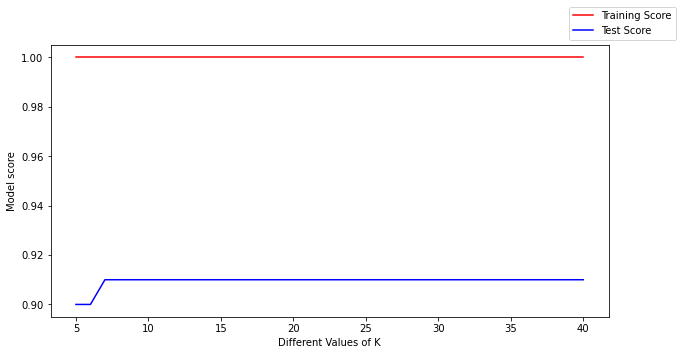

Plotting Train Test Error For Random State  35


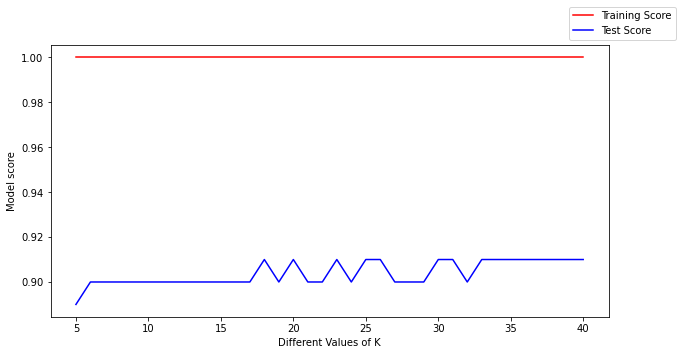

Plotting Train Test Error For Random State  36


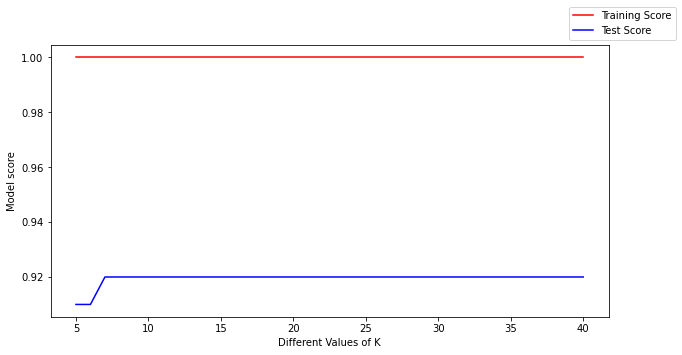

Plotting Train Test Error For Random State  37


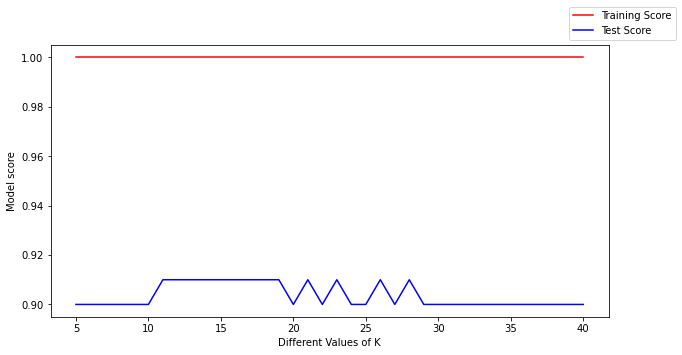

Plotting Train Test Error For Random State  38


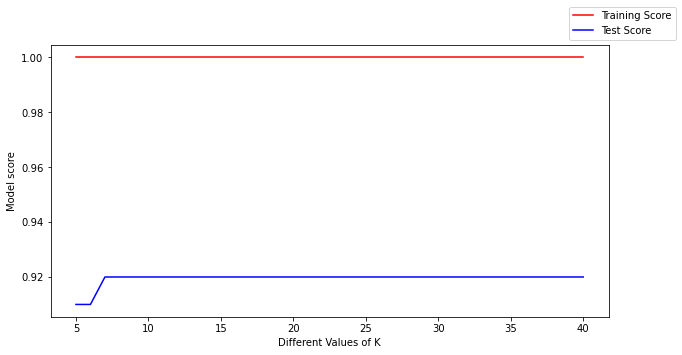

Plotting Train Test Error For Random State  39


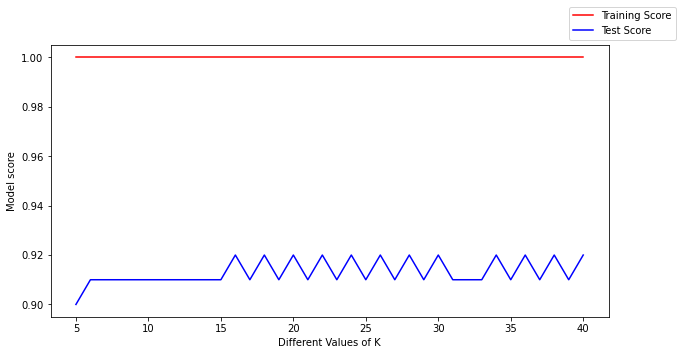

Plotting Train Test Error For Random State  40


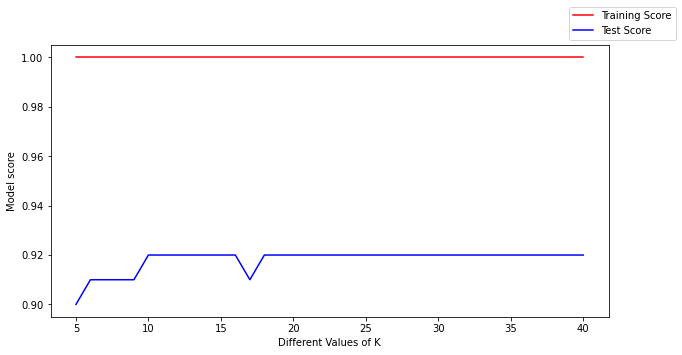

In [50]:
# K-neighbours Classifier

# First Splitting the data set into train & test data set so that while scaling or normalizing, test data should not affect train data
# Second, different random states can give different results. So we need to test for multiple random states
# Third, for every random state, different value of k can give different results. So, we need to test for multiple values of k
# for each of the random state

# fit gives you mean and standard deviation
# So we do "fit" the model using train data and then "transform" or apply that mean & std on test data.

# Scaling should be done separately on train data & test data. Data leak issue occurs.
# It may show higher accuracy but might not be true
# Scaling or Normalization
# This is done to scale or normalize all the variable with different scales so that all these variable become comparable. 
# Compare Km/Hr to Mtr/Sec

# We check for multiple random state & for each random state, we check for multiple K values
# This is how we can come to a conclusion which random state and value of K is to be chosen
# We can also change the metric & weights as we find appropriate
# We can apply any condition we like

ran_state = np.arange(1,41)
neighbours = np.arange(5,41)

k_value_for_plot          = []
test_score_for_plot       = []
train_score_for_plot      = []
test_accuracy_list        = []
train_accuracy_list       = []
desired_k_value_list      = []
desired_random_state_list = []
conf_matrix_report_list   = []
class_report_list         = []


for r_state in ran_state:
    
    # Splitting dataset into training & test set
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=r_state)
    
    # Normalizing Data
    std_scaler = StandardScaler()
    std_scaler.fit(X_train)
    X_train_scaled = std_scaler.transform(X_train)
    X_test_scaled = std_scaler.transform(X_test)
    
    for k_value in neighbours:
        
        KNN = KNeighborsClassifier(n_neighbors=k_value,weights='distance',algorithm='auto',metric='minkowski',p=2)
        KNN.fit(X_train_scaled,y_train)
        y_pred = KNN.predict(X_test_scaled)
        
        conf_matrix  = metrics.confusion_matrix(y_test,y_pred)
        class_report = metrics.classification_report(y_test,y_pred)
        train_score  = np.round(KNN.score(X_train_scaled,y_train),2)
        test_score   = np.round(KNN.score(X_test_scaled,y_test),2)
        
        test_accuracy_list.append(test_score)
        train_accuracy_list.append(train_score)
        desired_k_value_list.append(k_value)
        desired_random_state_list.append(r_state)
        conf_matrix_report_list.append(conf_matrix)
        class_report_list.append(class_report)
        k_value_for_plot.append(k_value)
        test_score_for_plot.append(test_score)
        train_score_for_plot.append(train_score)
    
    print("Plotting Train Test Error For Random State ",r_state)
    plt.figure(figsize=(10,5))
    plt.xlabel('Different Values of K')
    plt.ylabel('Model score')
    plt.plot(k_value_for_plot, train_score_for_plot, color = 'r', label = "Training Score")
    plt.plot(k_value_for_plot, test_score_for_plot, color = 'b', label = 'Test Score')
    plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
    plt.show()
    k_value_for_plot.clear()
    test_score_for_plot.clear()
    train_score_for_plot.clear()
        
    
test_accuracy_array = np.array(test_accuracy_list)
result = np.where(test_accuracy_array>0.90)
result = result[0]

In [51]:
for r in result:  
    conf = conf_matrix_report_list[r]
    if(conf[1,0]<100 and conf[0,1]<15):
       print('Test Accuracy',test_accuracy_list[r],'Train Accuracy',train_accuracy_list[r],'K Value ' ,desired_k_value_list[r],'Random State ',desired_random_state_list[r])
       print()
       print("Confusion Matrix ")
       print(conf_matrix_report_list[r])
       print()
       print("Classification Report ")
       print(class_report_list[r])
       print("--------------------------------------------------------")


Test Accuracy 0.93 Train Accuracy 1.0 K Value  14 Random State  30

Confusion Matrix 
[[1357   14]
 [  97   24]]

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1371
           1       0.63      0.20      0.30       121

    accuracy                           0.93      1492
   macro avg       0.78      0.59      0.63      1492
weighted avg       0.91      0.93      0.91      1492

--------------------------------------------------------
Test Accuracy 0.93 Train Accuracy 1.0 K Value  15 Random State  30

Confusion Matrix 
[[1357   14]
 [  96   25]]

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1371
           1       0.64      0.21      0.31       121

    accuracy                           0.93      1492
   macro avg       0.79      0.60      0.64      1492
weighted avg       0.91      0.93      0.91      1492

---------------

In [53]:
## KNN Classifier Result

# For K Value  18 & Random State  30 
# We get
# Test Accuracy 93% Train Accuracy 100%


 Confusion Matrix 
 [[1358   13]
 [  96   25]]

 Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1371
           1       0.66      0.21      0.31       121

    accuracy                           0.93      1492
   macro avg       0.80      0.60      0.64      1492
weighted avg       0.91      0.93      0.91      1492

# Lowest False Positives = 13 & False Negatives = 96
# Precision & Recall for class 1(Loan Takers) is highest 66% & 21% respectively considering the biased dataset


#### Training Gaussian Naive Bayes

In [92]:
ran_state = np.arange(1,50)

test_accuracy_list        = []
train_accuracy_list       = []
desired_random_state_list = []
conf_matrix_report_list   = []
class_report_list         = [] 
 


for r_state in ran_state:
    GNB_X_train,GNB_X_test,GNB_y_train,GNB_y_test = train_test_split(X,y,test_size=0.3,random_state=r_state)
    
    gnb = GaussianNB()
    gnb.fit(GNB_X_train,GNB_y_train)
    GNB_y_pred = gnb.predict(GNB_X_test)
    
    conf_matrix = metrics.confusion_matrix(GNB_y_test,GNB_y_pred)
    class_report = metrics.classification_report(GNB_y_test,GNB_y_pred)
    test_score = np.round(gnb.score(GNB_X_test,GNB_y_test),2)
    train_score = np.round(gnb.score(GNB_X_train,GNB_y_train),2)
    test_accuracy_list.append(test_score)
    train_accuracy_list.append(train_score)   
    desired_random_state_list.append(r_state)
    conf_matrix_report_list.append(conf_matrix)
    class_report_list.append(class_report)
 
    
test_accuracy_array = np.array(test_accuracy_list)
result = np.where(test_accuracy_array>0.80)
result = result[0]


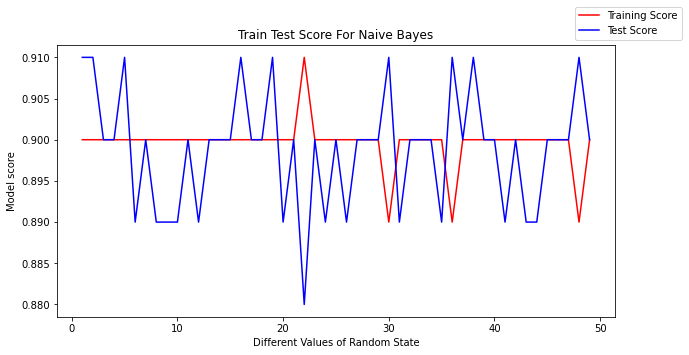

In [93]:
# Plotting Train Test Score For Naive Bayes

plt.figure(figsize=(10,5))
plt.xlabel('Different Values of Random State')
plt.ylabel('Model score')
plt.title('Train Test Score For Naive Bayes')
plt.plot(desired_random_state_list, train_accuracy_list, color = 'r', label = "Training Score")
plt.plot(desired_random_state_list, test_accuracy_list, color = 'b', label = 'Test Score')
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
plt.show()

In [94]:
for r in result:  
    conf = conf_matrix_report_list[r]
    if(test_score_for_plot[r]>0.90):
       print('Test Accuracy',test_score_for_plot[r],'Train Accuracy',train_score_for_plot[r],'Random State ',desired_random_state_list[r])
       print()
       print("Confusion Matrix ")
       print(conf_matrix_report_list[r])
       print()
       print("Classification Report ")
       print(class_report_list[r])
       print("--------------------------------------------------------")


Test Accuracy 0.91 Train Accuracy 0.9 Random State  1

Confusion Matrix 
[[1315   41]
 [  98   38]]

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.48      0.28      0.35       136

    accuracy                           0.91      1492
   macro avg       0.71      0.62      0.65      1492
weighted avg       0.89      0.91      0.90      1492

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 0.9 Random State  2

Confusion Matrix 
[[1319   39]
 [  98   36]]

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1358
           1       0.48      0.27      0.34       134

    accuracy                           0.91      1492
   macro avg       0.71      0.62      0.65      1492
weighted avg       0.89      0.91      0.90      1492

-----------------------------------------

In [91]:
## Naive Bayes Classifier Result

# For Random State  2 
# We get
# Test Accuracy 91% Train Accuracy 90%

# Test Accuracy 0.91 Train Accuracy 0.9 Random State  2

 Confusion Matrix 
 [[1319   39]
 [  98   36]]

 Classification Report 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      1358
          1       0.48      0.27      0.34       134

    accuracy                           0.91      1492
   macro avg       0.71      0.62      0.65      1492
weighted avg       0.89      0.91      0.90      1492

# Lowest False Positive = 39 & False Negatives = 98
# Precision & Recall for class 1(Loan Takers) is low 48% & 27% respectively considering the biased dataset
----------------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 0.89 Random State  36

Confusion Matrix 
[[1310   46]
 [  87   49]]

Classification Report 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1356
           1       0.52      0.36      0.42       136

    accuracy                           0.91      1492
   macro avg       0.73      0.66      0.69      1492
weighted avg       0.90      0.91      0.90      1492

# For this,False Positive = 46 & False Negatives = 87
# But here Precision & Recall for class 1(Loan Takers) is highest for Naive Bayes 52% & 36% respectively considering the biased dataset


#### Training Logistic Regression

In [95]:

ran_state = np.arange(1,50)

test_accuracy_list = []
train_accuracy_list = []
desired_random_state_list = []
conf_matrix_report_list = []
class_report_list = []


for r_state in ran_state:

    
    LR_X_train,LR_X_test,LR_y_train,LR_y_test = train_test_split(X,y,test_size=0.3,random_state=r_state)
    
    logistic_regression = LogisticRegression()
    logistic_regression.fit(LR_X_train,LR_y_train)
    LR_y_predict = logistic_regression.predict(LR_X_test)
    
    conf_matrix = metrics.confusion_matrix(LR_y_test,LR_y_predict)
    class_report = metrics.classification_report(LR_y_test,LR_y_predict)
    test_score = np.round(logistic_regression.score(LR_X_test,LR_y_test),2)
    train_score = np.round(logistic_regression.score(LR_X_train,LR_y_train),2)
    test_accuracy_list.append(test_score)
    train_accuracy_list.append(train_score)   
    desired_random_state_list.append(r_state)
    conf_matrix_report_list.append(conf_matrix)
    class_report_list.append(class_report)
        
       
        
test_accuracy_array = np.array(test_accuracy_list)
result = np.where(test_accuracy_array>0.80)
result = result[0]

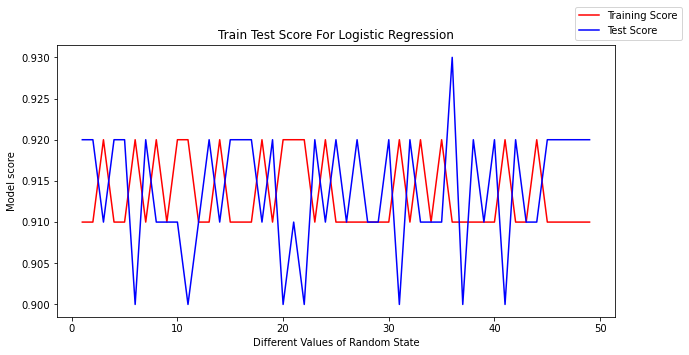

In [96]:
# Plotting Train Test Score For Logistic Regression


plt.figure(figsize=(10,5))
plt.xlabel('Different Values of Random State')
plt.ylabel('Model score')
plt.title('Train Test Score For Logistic Regression')
plt.plot(desired_random_state_list, train_accuracy_list, color = 'r', label = "Training Score")
plt.plot(desired_random_state_list, test_accuracy_list, color = 'b', label = 'Test Score')
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
plt.show()

In [97]:
for r in result:  
    conf = conf_matrix_report_list[r]    
    if(test_score_for_plot[r]>0.90):
       print('Test Accuracy',test_score_for_plot[r],'Train Accuracy',train_score_for_plot[r],'Random State ',desired_random_state_list[r])
       print()
       print("Confusion Matrix ")
       print(conf_matrix_report_list[r])
       print()
       print("Classification Report ")
       print(class_report_list[r])
       print("--------------------------------------------------------")


Test Accuracy 0.91 Train Accuracy 0.9 Random State  1

Confusion Matrix 
[[1342   14]
 [ 106   30]]

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1356
           1       0.68      0.22      0.33       136

    accuracy                           0.92      1492
   macro avg       0.80      0.61      0.65      1492
weighted avg       0.90      0.92      0.90      1492

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 0.9 Random State  2

Confusion Matrix 
[[1347   11]
 [ 107   27]]

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1358
           1       0.71      0.20      0.31       134

    accuracy                           0.92      1492
   macro avg       0.82      0.60      0.64      1492
weighted avg       0.91      0.92      0.90      1492

-----------------------------------------

In [88]:
## Logistic Regression Classifier Result

# For Random State  36 
# We get
# Test Accuracy 91% Train Accuracy 89%


 Confusion Matrix 
 [[1348    8]
 [ 102   34]]

 Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1356
           1       0.81      0.25      0.38       136

    accuracy                           0.93      1492
   macro avg       0.87      0.62      0.67      1492
weighted avg       0.92      0.93      0.91      1492

# Lowest False Positive = 8 & False Negatives = 102
# Precision & Recall for class 1(Loan Takers) is highest 81% & 25% respectively considering the biased dataset

## 7. Give your reasoning on which is the best model in this case and why it performs better?

In [ ]:
## KNN Classifier Result

# For K Value  18 & Random State  30 
# We get
# Test Accuracy 93% Train Accuracy 100%


# Confusion Matrix 
# [[1358   13]
# [  96   25]]

# Classification Report 
#              precision    recall  f1-score   support

#           0       0.93      0.99      0.96      1371
#           1       0.66      0.21      0.31       121

#    accuracy                           0.93      1492
#   macro avg       0.80      0.60      0.64      1492
#weighted avg       0.91      0.93      0.91      1492

# Lowest False Positives = 13 & False Negatives = 96
# Precision & Recall for class 1(Loan Takers) is highest 66% & 21% respectively considering the biased dataset


In [ ]:
## Naive Bayes Classifier Result

# For Random State  2 
# We get
# Test Accuracy 91% Train Accuracy 90%

# Test Accuracy 0.91 Train Accuracy 0.9 Random State  2

 Confusion Matrix 
 [[1319   39]
 [  98   36]]

 Classification Report 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      1358
          1       0.48      0.27      0.34       134

    accuracy                           0.91      1492
   macro avg       0.71      0.62      0.65      1492
weighted avg       0.89      0.91      0.90      1492

# Lowest False Positive = 39 & False Negatives = 98
# Precision & Recall for class 1(Loan Takers) is low 48% & 27% respectively considering the biased dataset
----------------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 0.89 Random State  36

Confusion Matrix 
[[1310   46]
 [  87   49]]

Classification Report 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1356
           1       0.52      0.36      0.42       136

    accuracy                           0.91      1492
   macro avg       0.73      0.66      0.69      1492
weighted avg       0.90      0.91      0.90      1492

# For this,False Positive = 46 & False Negatives = 87
# But here Precision & Recall for class 1(Loan Takers) is highest for Naive Bayes 52% & 36% respectively considering the biased dataset


In [ ]:
## Logistic Regression Classifier Result

# For Random State  36 
# We get
# Test Accuracy 91% Train Accuracy 89%


 Confusion Matrix 
 [[1348    8]
 [ 102   34]]

 Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1356
           1       0.81      0.25      0.38       136

    accuracy                           0.93      1492
   macro avg       0.87      0.62      0.67      1492
weighted avg       0.92      0.93      0.91      1492

# Lowest False Positives = 8 & False Negatives = 102
# Precision & Recall for class 1(Loan Takers) is highest 81% & 25% respectively considering the biased dataset

In [ ]:
## Logistic Regression is the best algorithm in this case as it gives highest Precision & Recall for class 1(Loan Takers) & relatively quite low
## false positives and false negatives despite biased dataset

In [ ]:
# By the question "why it performs better", I assume that the question is being asked as general and not particular to this dataset
# I still need to Google about advantages & disadvantages of all the algorithms I have learned so far 

# Below are my observations:

# KNN is quite slow as compared to Naive Bayes & Logistic Regression
# KNN & Logistic Regression, both are Discriminative model while Naive Bayes is Generative model

# Generative model: Naive Bayes models the joint distribution of the feature X and target Y, and then predicts the posterior probability given as P(y|x)
# Discriminative model: Logistic regression directly models the posterior probability of P(y|x) by learning the input to output mapping by minimising the error.
    
#This(Discriminative modeling) might be the reason KNN & Logistic Regression performs better than Naive Bayes (at least in some cases)

# Right now, at this moment these are the only points I have come up with. Nothing else is coming into my mind.

## END OF ASSIGNMENT